In [45]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [81]:
#Q1
#Exercise 2.5

In [132]:
#Stationary setting, Action Value Estimate: Sample Average
def Bandit(k, ep = 0.1, m = 100):
    Avg_rew = []
    Optimal = []
    total = 100
    action = random.randint(0,9)
    N = []
    Reward = 0
    Q_estimates = []
    Q_Actual = np.random.normal(0, 1, k)
    for i in range(k):
        N.append(0)
        Q_estimates.append(0)
    for i in range(1, m+1, 1):
        guess = random.uniform(0,1)
        if guess > ep:
            if i != 1:
                action = np.argmax(Q_estimates)
        else:
            action = random.randint(0,9)
        Reward = np.random.normal(Q_Actual[action], 1, total)[random.randint(0, total - 1)]
        N[action] = N[action] + 1
        Q_estimates[action] = Q_estimates[action] + (1/N[action])*(Reward - Q_estimates[action])
        
        opt = np.argmax(Q_Actual)
        if opt == action:
            Optimal.append(1) #Optimal array
        else:
            Optimal.append(0)
        Avg_rew.append(Reward) #Reward array
    return Avg_rew, Optimal
        

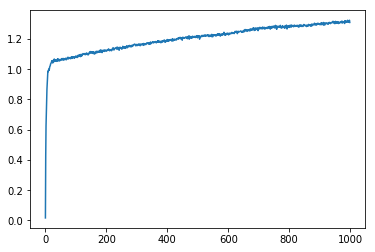

In [68]:
# plotting avg graphs
a = []
for i in range(2000):
    a.append(Bandit(10, 0.01, 1000))

avg = np.mean(a, axis = 0)
plt.plot(avg)
plt.show()


In [98]:
# Non-stationary setting, action-value estimates: sample averages
def BanditNSa(k, ep = 0.1, m = 100):
    Avg_rew = []
    Optimal = []
    total = 100
    action = random.randint(0,9)
    N = []
    Reward = 0
    Q_estimates = []
    Q_Actual = np.random.normal(0, 0, k)
    for i in range(k):
        N.append(0)
        Q_estimates.append(0)
    for i in range(1, m+1, 1):
        Q_addition = np.random.normal(0, 0.01, k)
        guess = random.uniform(0,1)
        if guess > ep:
            if i != 1:
                action = np.argmax(Q_estimates)
        else:
            action = random.randint(0,9)
        Reward = np.random.normal(Q_Actual[action], 1, 1)
        N[action] = N[action] + 1
        Q_estimates[action] = Q_estimates[action] + (1/N[action])*(Reward - Q_estimates[action])
        
        
        opt = np.argmax(Q_Actual)
        if opt == action:
            Optimal.append(1) #Optimal array
        else:
            Optimal.append(0)
        Avg_rew.append(Reward) #Reward array
        
        Q_addition = np.random.normal(0, 0.01, k)
        Q_Actual = np.add(Q_Actual, Q_addition)
        
        Q_addition = np.random.normal(0, 0.01, k)
        Q_Actual = np.add(Q_Actual, Q_addition)
        
    return Avg_rew, Optimal

In [99]:
# non-stationary setting, action-value estimates: constant step
def BanditNSc(k, ep = 0.1, m = 100, alpha = 0.1):
    Avg_rew = []
    Optimal = []
    opt = 0
    total = 100
    action = random.randint(0,9)
    N = []
    Reward = 0
    Q_estimates = []
    Q_Actual = np.random.normal(0, 0, k)
    for i in range(k):
        N.append(0)
        Q_estimates.append(0)
    for i in range(1, m+1, 1):
        guess = random.uniform(0,1)
        if guess > ep:
            if i != 1:
                action = np.argmax(Q_estimates)
        else:
            action = random.randint(0,9)
        Reward = np.random.normal(Q_Actual[action], 1, 1)
        N[action] = N[action] + 1
        Q_estimates[action] = Q_estimates[action] + alpha*(Reward - Q_estimates[action])
        
        opt = np.argmax(Q_Actual)
        if opt == action:
            Optimal.append(1) #Optimal array
        else:
            Optimal.append(0)
        Avg_rew.append(Reward) #Reward array
        
        Q_addition = np.random.normal(0, 0.01, k)
        Q_Actual = np.add(Q_Actual, Q_addition)
           
    return Avg_rew, Optimal

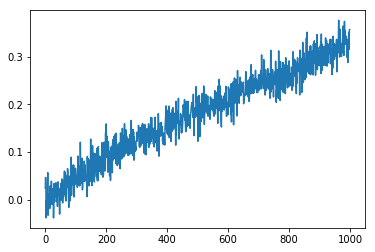

In [100]:
# plot of avg rewards non-stationary setting, action-value estimates: sample averages
a = []
for i in range(2000):
    Avg_rew, Optimal = BanditNSa(10, 0.01, 1000)
    a.append(Avg_rew)

avg = np.mean(a, axis = 0)
plt.plot(avg)
plt.show()

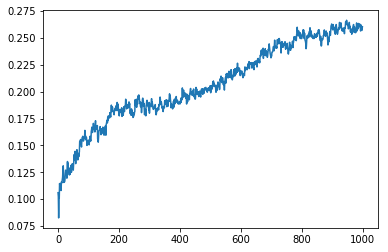

In [101]:
# plot of optimal percentage non-stationary setting, action-value estimates: sample averages
a = []
for i in range(2000):
    Avg_rew, Optimal = BanditNSa(10, 0.01, 1000)
    a.append(Optimal)

avg = np.mean(a, axis = 0)
plt.plot(avg)
plt.show()

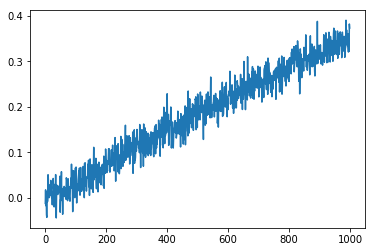

In [104]:
# plot of avg rewards non-stationary setting, action-value estimates: constant
a = []
for i in range(2000):
    Avg_rew, Optimal = BanditNSc(10, 0.1, 1000)
    a.append(Avg_rew)

avg = np.mean(a, axis = 0)
plt.plot(avg)
plt.show()

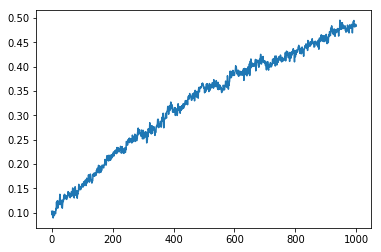

In [105]:
# plot of optimal percentage non-stationary setting, action-value estimates: constant
a = []
for i in range(2000):
    Avg_rew, Optimal = BanditNSc(10, 0.1, 1000)
    a.append(Optimal)

avg = np.mean(a, axis = 0)
plt.plot(avg)
plt.show()

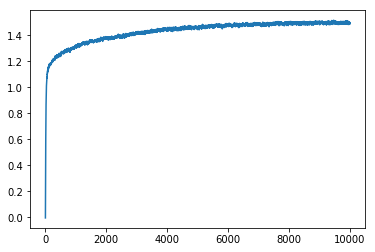

In [80]:
# plot for non-stationary setting, action-value estimates: constant step
a = []
for i in range(2000):
    a.append(BanditNSc(10, 0.01, 10000))

avg = np.mean(a, axis = 0)
plt.plot(avg)
plt.show()

In [82]:
#Q2 
#Figure 2.3

In [108]:
#Stationary setting, Optimistic Initial Values, action-value estimates: sample averages
def BanditSOIV(k, ep = 0.0, t = 2000):
    Optimal = []
    Avg_rew = []
    action = random.randint(0,9)
    N = []
    Reward = 0
    Q_estimates = []
    Q_Actual = np.random.normal(0, 1, k)
    for i in range(k):
        N.append(0)
        Q_estimates.append(5) # Initialize with optimistically high value
    for i in range(1, t+1, 1):
        guess = random.uniform(0,1)
        if guess > ep:
            if i != 1:
                action = np.argmax(Q_estimates)
            else: 
                optimal = optimal + 1
        else:
            action = random.randint(0,9)
            
        Reward = np.random.normal(Q_Actual[action], 1, 1)
        N[action] = N[action] + 1
        Q_estimates[action] = Q_estimates[action] + (1/N[action])*(Reward - Q_estimates[action])
        
        opt = np.argmax(Q_Actual)
        if opt == action:
            Optimal.append(1) #Optimal array
        else:
            Optimal.append(0)
        
        Avg_rew.append(Reward) #Reward array
    return Avg_rew, Optimal
        

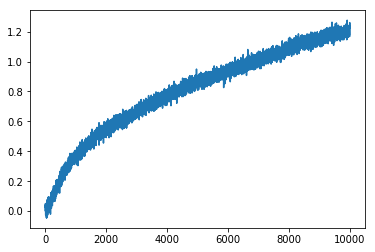

In [113]:
a = []
op = []
for i in range(2000):
    Avg_rew, Optimal = BanditNSc(10, 0.0, 10000)
    a.append(Avg_rew)
    op.append(Optimal)

avg1 = np.mean(a, axis = 0)
avg2 = np.mean(op, axis = 0)
plt.plot(avg1)
plt.show()

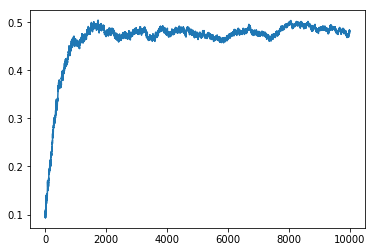

In [114]:
plt.plot(avg2)
plt.show()

In [83]:
#Nonstationary setting, action-value estimates: sample averages, Optimistic Initial Values
def BanditNSOIVa(k, ep = 0.0, t = 2000):
    optimal = 
    Avg_rew = []
    total = 100
    action = random.randint(0,9)
    N = []
    Reward = 0
    Q_estimates = []
    Q_Actual = np.random.normal(0, 1, k)
    for i in range(k):
        N.append(0)
        Q_estimates.append(5)
    for i in range(1, t+1, 1):
        guess = random.uniform(0,1)
        if guess >= ep:
            if i != 1:
                action = np.argmax(Q_estimates)
            else: 
                optimal = optimal + 1
        else:
            action = random.randint(0,9)
            
        Reward = np.random.normal(Q_Actual[action], 1, 1)
        N[action] = N[action] + 1
        Q_estimates[action] = Q_estimates[action] + (1/N[action])*(Reward - Q_estimates[action])
        Q_addition = np.random.normal(0, 0.01, k)
        Q_Actual = np.add(Q_Actual, Q_addition)
        Avg_rew.append(Q_estimates[action])
    return Avg_rew, 
        

5


In [129]:
#Stationary setting, action-value estimates: constant step, Optimistic Initial Values
def BanditSOIVc(k, ep = 0.0, t = 2000, alpha = 0.1):
    Optimal = []
    Avg_rew = []
    action = random.randint(0,9)
    N = []
    Reward = 0
    Q_estimates = []
    Q_Actual = np.random.normal(0, 1, k)
    for i in range(k):
        N.append(0)
        Q_estimates.append(5) # Initialize with optimistically high value
    for i in range(1, t+1, 1):
        guess = random.uniform(0,1)
        if guess > ep:
            if i != 1:
                action = np.argmax(Q_estimates)

        else:
            action = random.randint(0,9)
            
        Reward = np.random.normal(Q_Actual[action], 1, 1)
        N[action] = N[action] + 1
        Q_estimates[action] = Q_estimates[action] + (alpha)*(Reward - Q_estimates[action])
        
        opt = np.argmax(Q_Actual)
        if opt == action:
            Optimal.append(1) #Optimal array
        else:
            Optimal.append(0)
        
        Avg_rew.append(Reward) #Reward array
    return Avg_rew, Optimal
        

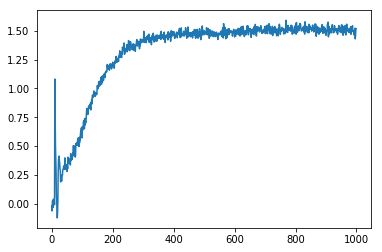

In [130]:
a = []
op = []
for i in range(2000):
    Avg_rew, Optimal = BanditSOIVc(10, 0.0, 1000, 0.1)
    a.append(Avg_rew)
    op.append(Optimal)

avg1 = np.mean(a, axis = 0)
avg2 = np.mean(op, axis = 0)
plt.plot(avg1)
plt.show()

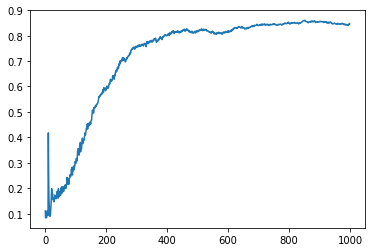

In [131]:
plt.plot(avg2)
plt.show()